Les fonctions vont être utilisées quand un besoin va être récurent dans un ou plusieurs scripts.  
Permet d'être DRY et de respecter la philosophie unix, et de gagner du temps et de la tranquilité quand on code.

> "Don't repeat yourself" (DRY) is a principle of software development aimed at reducing repetition of software patterns. [Wikipedia](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)

>     " Voici la philosophie d'Unix :
        Écrivez des programmes qui effectuent une seule chose et qui le font bien.
        Écrivez des programmes qui collaborent.
        Écrivez des programmes pour gérer des flux de texte [en pratique des flux d'octets], car c'est une interface universelle. "  
        
[Wikipedia](https://fr.wikipedia.org/wiki/Philosophie_d%27Unix)


Exemple:

##### Mauvais

In [1]:
temperature_lyon = 12
temperature_marseille = 35
temperature_paris = -7

In [2]:
temp_fahrenheit_lyon = temperature_lyon * 9/5 + 32
temp_fahrenheit_marseille = temperature_marseille * 9/5 + 32
temp_fahrenheit_paris = temperature_paris * 9/5 + 32

#### Moins mauvais

In [3]:
temp_in_celsius = {'lyon': 12, 'marseille': 35, 'paris': -7, 'aubagne': 32}

In [4]:
def celsius_to_fahrenheit(t_in_celsius):
    return t_in_celsius  * 9/5 + 32

In [5]:
temp_in_fahrenheit = {}
for key, value in temp_in_celsius.items():
    temp_in_fahrenheit[key]=celsius_to_fahrenheit(value)
temp_in_fahrenheit

{'lyon': 53.6, 'marseille': 95.0, 'paris': 19.4, 'aubagne': 89.6}

#### La fonction

Une fonction prends 0 ou plus inputs (variable/objet en entrée), et en retourne 0 ou plus.

In [7]:
def coucou():
    print("coucou")

In [12]:
output_coucou = coucou()

coucou


In [14]:
output_coucou is None

True

In [39]:
def une_fonction(variable_1, variable_2):
    return variable_1 + variable_2

**Question**: donnez un exemple de fonction qui ne retourne pas output, mais qui fait quand même quelque chose ?

In [29]:
import time

In [30]:
def print_time():
    print(time.localtime())
     

In [31]:
print_time()

time.struct_time(tm_year=2022, tm_mon=4, tm_mday=14, tm_hour=9, tm_min=3, tm_sec=23, tm_wday=3, tm_yday=104, tm_isdst=0)


### Docstring

In [37]:
def ajoute_deux_nombres(variable_1, variable_2):
    """
    Ajoute deux nombres entre eux
    """
    return variable_1 + variable_2

In [40]:
une_fonction?

Signature: une_fonction(variable_1, variable_2)
Docstring: <no docstring>
File:      /tmp/ipykernel_608/1636446849.py
Type:      function


In [42]:
ajoute_deux_nombres?

Signature: ajoute_deux_nombres(variable_1, variable_2)
Docstring: Ajoute deux nombres entre eux
File:      /tmp/ipykernel_608/1640830038.py
Type:      function


In [45]:
ajoute_deux_nombres

<function __main__.ajoute_deux_nombres(variable_1, variable_2)>

In [46]:
time.sleep

<function time.sleep>

Convention pour la docstring:
- [PEP 257](https://www.python.org/dev/peps/pep-0257/)

Mais n'est pas toujours suivie (e.g. [numpy](https://numpydoc.readthedocs.io/en/latest/), pandas, etc).


### Hint typing

In [55]:
def ajoute_deux_nombres(variable_1 : int, variable_2: int) -> int:
    """
    Ajoute deux nombres entre eux
    """
    return variable_1 + variable_2

> Adding type hints like this has no runtime effect: they are only hints and are not enforced on their own. For instance, if we use a wrong type for the (admittedly badly named) align argument, the code still runs without any problems or warnings.

In [57]:
ajoute_deux_nombres("rentrez votre age", 
                    "rentrez l'age de votre père")

"rentrez votre agerentrez l'age de votre père"

In [58]:
ajoute_deux_nombres(3,2)

5

Pour aller plus loin sur le sujet : https://realpython.com/python-type-checking/

On peut forcer les type en utilisant la librairie [pydantic](https://pydantic-docs.helpmanual.io/)

### Fonction anonyme 

In [23]:
ajoute_deux_nombres(3,2)

5

In [63]:
lambda x,y: input(x + y )(3,2)

<function __main__.<lambda>(x, y)>

In [64]:
une_fonction_lambda = lambda x,y: x + y #Mauvaise pratique

In [66]:
une_fonction_lambda(1,2)

3

In [65]:
id(une_fonction_lambda)

139714439643792

### L'opérateur * (splat), l'unpacking et Args and Kwargs

Sam et Max : https://webcache.googleusercontent.com/search?q=cache:6T2ZA-vGNsoJ:https://sametmax.oprax.fr/operateur-splat-ou-etoile-en-python/index.html+&cd=4&hl=en&ct=clnk&gl=fr&client=ubuntu

In [68]:
drapeau = ("bleu", "blanc", "rouge")

In [70]:
a,b,c = drapeau # ceci est de l'unpacking

In [71]:
c

'rouge'

In [73]:
a,b = drapeau

ValueError: not enough values to unpack (expected 4, got 3)

In [76]:
drapeau = ("bleu", "blanc", "rouge")
a, *autres_couleurs = drapeau

In [79]:
a

'bleu'

In [80]:
autres_couleurs

['blanc', 'rouge']

In [93]:
def afficher_trois_elements(elem1, elem2=None, elem3=None):
    print(elem1)
    print(elem2)
    print(elem3)

In [94]:
 afficher_trois_elements(drapeau)

('bleu', 'blanc', 'rouge')
None
None


In [95]:
afficher_trois_elements(*drapeau)

bleu
blanc
rouge


In [100]:
liste_signature = [1,2]

In [101]:
afficher_trois_elements(*liste_signature)

1
2
None


In [102]:
afficher_trois_elements(1,2)

1
2
None


In [105]:
l = [1, 2, 3, "element que l'on ne veut pas"]
afficher_trois_elements(*l[:-1])

1
2
3


In [107]:
def afficher_trois_elements(elem1, elem2=None, elem3=None):
    print(elem1)
    print(elem2)
    print(elem3)

In [108]:
elements = {"elem1": "eau",  "elem3": "air"}
afficher_trois_elements(**elements)

eau
None
air


In [109]:
afficher_trois_elements(elem3="air", elem1="eau")

eau
None
air


In [110]:
afficher_trois_elements(*elements)

elem1
elem3
None


### Paramétrage dynamique

#### Via listes (args)

In [112]:
def multiply(a, b):
    return a*b

In [113]:
multiply(2, 3)

6

In [114]:
 def multiply(elements_a_multiplier):
    res = 1
    for i in elements_a_multiplier:
        res = res * i
    return res

In [115]:
multiply((1, 2, 3, 4))

24

In [124]:
def multiply(*tous_les_elements):
    res = 1
    for i in tous_les_elements:
        res = res * i
    return res

In [125]:
multiply(1, 2, 3)

6

In [126]:
multiply([1, 2, 3])

[1, 2, 3]

On peut passer un ensemble de paramètres, ou une liste !  
La convention est d'appeler les listes de paramètres **args**.

#### Via dictionnaires (kwargs)

In [132]:
 def afficher_recette(recette, **ingredients): # ingrédients sera un dictionnaire
    print(recette)
    for ingredient in ingredients.items():
         #print(" - %s: %s" % ingredient)
        print(f" - {ingredient[0]}: {ingredient[1]}")


In [133]:
afficher_recette("moukraines à la glaviouse",
...                  creme="trop", # on doit donner le nom de ce paramètre
...                  moukraines= "suffisamment",
...                  glaviouse="si disponible",
                     dessert = "coucou")

moukraines à la glaviouse
 - creme: trop
 - moukraines: suffisamment
 - glaviouse: si disponible
 - dessert: coucou


### Finalité

In [134]:
def affichage_hybride(parametre_normal,
                       parametre_avec_default="valeur par défaut",
                       *args,
                       **kwargs):
    print(parametre_normal)
    print(parametre_avec_default)
    print(args)
    print(kwargs)

In [135]:
affichage_hybride("param1", "param2", "infini1", "infini2", kwinfini1=1, kwinfini2=2)

param1
param2
('infini1', 'infini2')
{'kwinfini1': 1, 'kwinfini2': 2}


In [137]:
affichage_hybride("param1", "param2", *["infini1", "infini2"], **{"kwinfini1":1, "kwinfini2":2})

param1
param2
('infini1', 'infini2')
{'kwinfini1': 1, 'kwinfini2': 2}


#### Exemple

In [139]:
%pip install matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [138]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

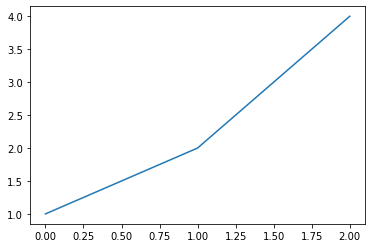

In [58]:
plt.plot([1,2,4])

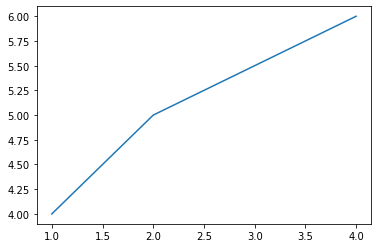

In [59]:
plt.plot([1,2,4], [4,5,6])

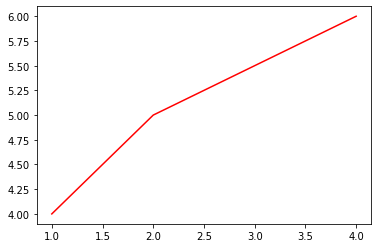

In [60]:
plt.plot([1,2,4], [4,5,6], color="red")